In [1]:
import numpy as np
import pandas as pd
import datetime
import matplotlib.pyplot as plt  
from netCDF4 import Dataset

# Short Term - Turrialba, Cartago

In [2]:
#Lectura de datos

TURR_IMN = pd.read_csv('/Users/maureenfonseca/Desktop/UCR/TURR_IMN.csv', sep=';')
TURR_GPM = pd.read_csv('/Users/maureenfonseca/Desktop/UCR/TURR_GPM_ST.csv', sep=',')

In [3]:
TURR_IMN['Date'] = pd.to_datetime(TURR_IMN['Date'],infer_datetime_format=True)
TURR_IMN.index = TURR_IMN['Date']

TURR_GPM['Date'] = pd.to_datetime(TURR_GPM['Date'],infer_datetime_format=True)
TURR_GPM.index = TURR_GPM['Date']

In [4]:
TURR_IMN_1 = TURR_IMN['pcp'].resample('1H').sum()
TURR_GPM_1 = TURR_GPM['pcp'].resample('1H').sum()

TURR_IMN_6 = TURR_IMN['pcp'].resample('6H').sum()
TURR_GPM_6 = TURR_GPM['pcp'].resample('6H').sum()
corr_6 = np.corrcoef(TURR_IMN_6, TURR_GPM_6)

TURR_IMN_12 = TURR_IMN['pcp'].resample('12H').sum()
TURR_GPM_12 = TURR_GPM['pcp'].resample('12H').sum()

TURR_IMN_24 = TURR_IMN['pcp'].resample('24H').sum()
TURR_GPM_24 = TURR_GPM['pcp'].resample('24H').sum()

/var/folders/v8/b0fnjf9d4q31sfz_8q4h4zxm0000gn/T/ipykernel_55042/2827257311.py:23: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(TURR_GPM_6.index)


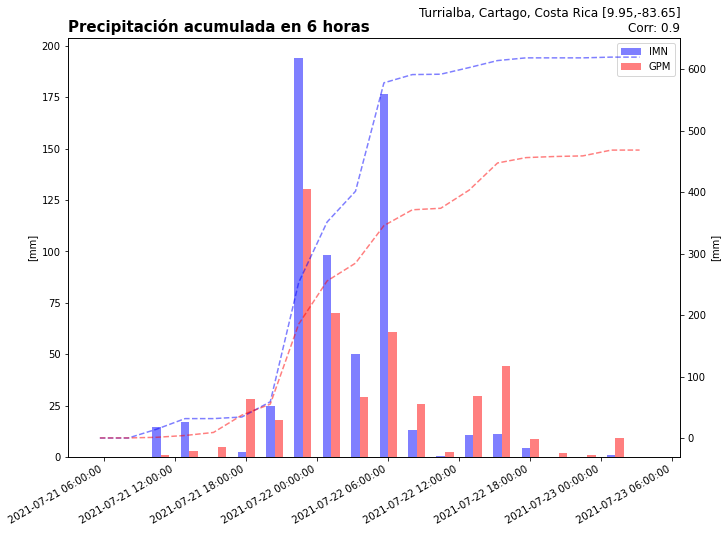

In [5]:
#Obtenemos la posicion de cada etiqueta en el eje de X
x = np.arange(len(TURR_IMN_6))
#tamaño de cada barra
width = 0.3

fig, ax = plt.subplots(figsize = (10,8))

#Generamos las barras para el conjunto de IMN
rects1 = ax.bar(x - width/2, TURR_IMN_6,width,label='IMN',color= 'blue',alpha=0.5)
rects2 = ax.bar(x + width/2, TURR_GPM_6, width, label='GPM',color= 'red',alpha=0.5)

twin_axes = ax.twinx() 
twin_axes.plot(x - width/2, np.cumsum(TURR_IMN_6),color= 'blue', linestyle='--', alpha=0.5)
twin_axes.plot(x - width/2, np.cumsum(TURR_GPM_6),color= 'red',linestyle='--',alpha=0.5)
twin_axes.set_ylabel('[mm]')


#Añadimos las etiquetas de identificacion de valores en el grafico
ax.set_ylabel('[mm]')
ax.set_title('Precipitación acumulada en 6 horas', fontweight='bold', fontsize=15, loc='left')
ax.set_title('Turrialba, Cartago, Costa Rica [9.95,-83.65]\nCorr: 0.9', fontsize=12, loc='right')
#ax.set_xticks(x)
ax.set_xticklabels(TURR_GPM_6.index)

ax.legend()
fig.tight_layout()
fig.autofmt_xdate()
plt.show()

# Middle Term - Turrialba, Cartago

In [6]:
#Lectura de datos

Data = pd.read_csv('/Users/maureenfonseca/Desktop/UCR/UNIFICADO.csv', sep=',')

In [7]:
#Indexando los datos con la fecha
Data['Date'] = pd.to_datetime(Data['Date'],infer_datetime_format=True)
Data.index = Data['Date']

In [8]:
#Extracción de datos
TURR_IMN2 = Data['TURR_IMN'].loc['2019-09-01 00:00:00':'2019-09-30 23:55:00']
TURR_GPM2 = Data['TURR_GPM'].loc['2019-09-01 00:00:00':'2019-09-30 23:55:00']

In [9]:
#Creando listas de los acumulados de precipitación
TURR_IMN_6 = TURR_IMN2.resample('6H').sum()
TURR_GPM_6 = TURR_GPM2.resample('6H').sum()
corr_6 = np.corrcoef(TURR_IMN_6, TURR_GPM_6)

TURR_IMN_24 = TURR_IMN2.resample('24H').sum()
TURR_GPM_24 = TURR_GPM2.resample('24H').sum()
corr_24 = np.corrcoef(TURR_IMN_24, TURR_GPM_24)

### Acumulado de 6 Horas

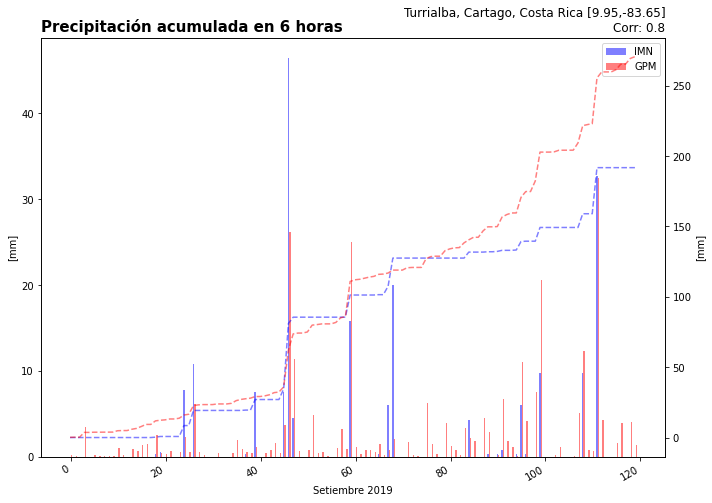

In [10]:
#Obtenemos la posicion de cada etiqueta en el eje de X
x = np.arange(len(TURR_IMN_6))
#tamaño de cada barra
width = 0.3

fig, ax = plt.subplots(figsize = (10,8))

#Generamos las barras para el conjunto de IMN
rects1 = ax.bar(x - width/2, TURR_IMN_6,width,label='IMN',color= 'blue',alpha=0.5)
rects2 = ax.bar(x + width/2, TURR_GPM_6, width, label='GPM',color= 'red',alpha=0.5)

twin_axes = ax.twinx() 
twin_axes.plot(x - width/2, np.cumsum(TURR_IMN_6),color= 'blue', linestyle='--', alpha=0.5)
twin_axes.plot(x - width/2, np.cumsum(TURR_GPM_6),color= 'red',linestyle='--',alpha=0.5)
twin_axes.set_ylabel('[mm]')


#Añadimos las etiquetas de identificacion de valores en el grafico
ax.set_ylabel('[mm]')
ax.set_xlabel('Setiembre 2019')
ax.set_title('Precipitación acumulada en 6 horas', fontweight='bold', fontsize=15, loc='left')
ax.set_title('Turrialba, Cartago, Costa Rica [9.95,-83.65]\nCorr: 0.8', fontsize=12, loc='right')
#ax.set_xticks(x)
#ax.set_xticklabels(x+1)

ax.legend()
fig.tight_layout()
fig.autofmt_xdate()
plt.show()

### Acumulado de 24 horas

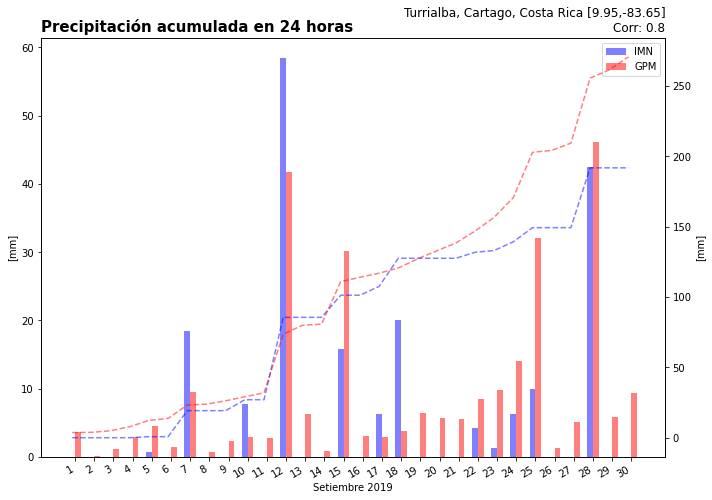

In [11]:
#Obtenemos la posicion de cada etiqueta en el eje de X
x = np.arange(len(TURR_IMN_24))
#tamaño de cada barra
width = 0.3

fig, ax = plt.subplots(figsize = (10,8))

#Generamos las barras para el conjunto de IMN
rects1 = ax.bar(x - width/2, TURR_IMN_24,width,label='IMN',color= 'blue',alpha=0.5)
rects2 = ax.bar(x + width/2, TURR_GPM_24, width, label='GPM',color= 'red',alpha=0.5)

twin_axes = ax.twinx() 
twin_axes.plot(x - width/2, np.cumsum(TURR_IMN_24),color= 'blue', linestyle='--', alpha=0.5)
twin_axes.plot(x - width/2, np.cumsum(TURR_GPM_24),color= 'red',linestyle='--',alpha=0.5)
twin_axes.set_ylabel('[mm]')


#Añadimos las etiquetas de identificacion de valores en el grafico
ax.set_ylabel('[mm]')
ax.set_xlabel('Setiembre 2019')
ax.set_title('Precipitación acumulada en 24 horas', fontweight='bold', fontsize=15, loc='left')
ax.set_title('Turrialba, Cartago, Costa Rica [9.95,-83.65]\nCorr: 0.8', fontsize=12, loc='right')
ax.set_xticks(x)
ax.set_xticklabels(x+1)

ax.legend()
fig.tight_layout()
fig.autofmt_xdate()
plt.show()

# Long Term - Santa Cruz, Guanacaste

In [44]:
#Lectura de datos

STCZ_IMN = pd.read_csv('/Users/maureenfonseca/Desktop/UCR/STCZ_LP_AWS.csv', sep=';')
STCZ_GPM = pd.read_csv('/Users/maureenfonseca/Desktop/UCR/STCZ_LP_GPM.csv', sep=',')

In [46]:
min_date = "2000-06-01"
max_date = "2021-10-01"
dates = pd.period_range(min_date, max_date, freq='30min')
Dates = dates[:-1]

In [47]:
Dates

PeriodIndex(['2000-06-01 00:00', '2000-06-01 00:30', '2000-06-01 01:00',
             '2000-06-01 01:30', '2000-06-01 02:00', '2000-06-01 02:30',
             '2000-06-01 03:00', '2000-06-01 03:30', '2000-06-01 04:00',
             '2000-06-01 04:30',
             ...
             '2021-09-30 19:00', '2021-09-30 19:30', '2021-09-30 20:00',
             '2021-09-30 20:30', '2021-09-30 21:00', '2021-09-30 21:30',
             '2021-09-30 22:00', '2021-09-30 22:30', '2021-09-30 23:00',
             '2021-09-30 23:30'],
            dtype='period[30T]', length=374016)

In [48]:
STCZ_GPM['Date'] = Dates

In [49]:
Date = []
for i in range(len(STCZ_IMN.Cuenca)):
    date = str(STCZ_IMN.Fecha[i])+' '+str(STCZ_IMN.Hora[i])
    Date.append(date)

In [50]:
STCZ_IMN['Date']= Date

In [52]:
STCZ_GPM['Date'] = STCZ_GPM['Date'].dt.to_timestamp('s').dt.strftime('%Y-%m-%d %H:%M:%S')

In [53]:
#Indexando los datos con la fecha
STCZ_IMN['Date'] = pd.to_datetime(STCZ_IMN['Date'],infer_datetime_format=True)
STCZ_IMN.index = STCZ_IMN['Date']

STCZ_GPM['Date'] = pd.to_datetime(STCZ_GPM['Date'],infer_datetime_format=True)
STCZ_GPM.index = STCZ_GPM['Date']

In [78]:
STCZ_GPM = STCZ_GPM.resample('1H').sum()

In [87]:
#Configurando las listas 
W_STCZ_IMN  = np.hamming(len(STCZ_IMN['Lluvia (mm)'].values))

FT_pcp_IMN = np.fft.fft(W_STCZ_IMN * (STCZ_IMN['Lluvia (mm)'] - STCZ_IMN['Lluvia (mm)'].mean()))
XFT_pcp_IMN = np.fft.fftfreq(len(FT_pcp_IMN),d=3600)

W_STCZ_GPM  = np.hamming(len(STCZ_GPM['GPM'].values))

FT_pcp_GPM = np.fft.fft(W_STCZ_GPM[0:1] * (STCZ_GPM['GPM'] - STCZ_GPM['GPM'].mean()))
XFT_pcp_GPM = np.fft.fftfreq(len(FT_pcp_GPM),d=3600)

### Graficación

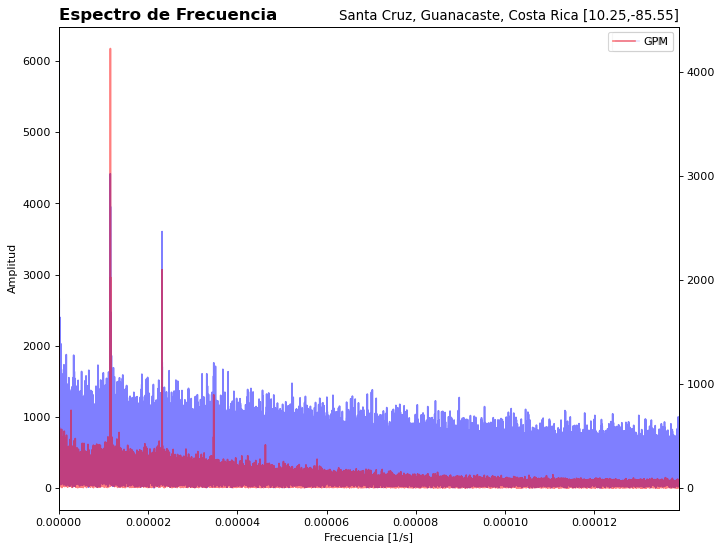

In [100]:
fig = plt.figure(figsize=(10,8), dpi=80)
ax1 = fig.add_subplot(111)

ax1.plot(XFT_pcp_IMN, np.abs(FT_pcp_IMN),color= 'blue', alpha=0.5, label='IMN')
ax1.set_ylabel('Amplitud')
ax1.set_xlabel('Frecuencia [1/s]')
ax1.legend()
ax1.set_xlim(0, np.max(XFT_pcp_IMN))
ax1.set_title('Espectro de Frecuencia', fontweight='bold', fontsize=15, loc='left')
ax1.set_title('Santa Cruz, Guanacaste, Costa Rica [10.25,-85.55]', fontsize=12, loc='right')

ax2 = ax1.twinx()
ax2.plot(XFT_pcp_GPM, np.abs(FT_pcp_GPM),color= 'red', alpha=0.5, label='GPM')
ax2.legend()